# **Step 1: Load the Dataset and Assign Proper Column Names**

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
url = "/content/drive/My Drive/DataScience/Assignment_no_2/pima-indians-diabetes.csv"
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv(url, names=column_names)

# **Step 2: Preprocess the Dataset to Normalize Values**

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
# Separate features and target variable
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Normalize the values
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# **Data Visualization using pairplot of the Dataset**

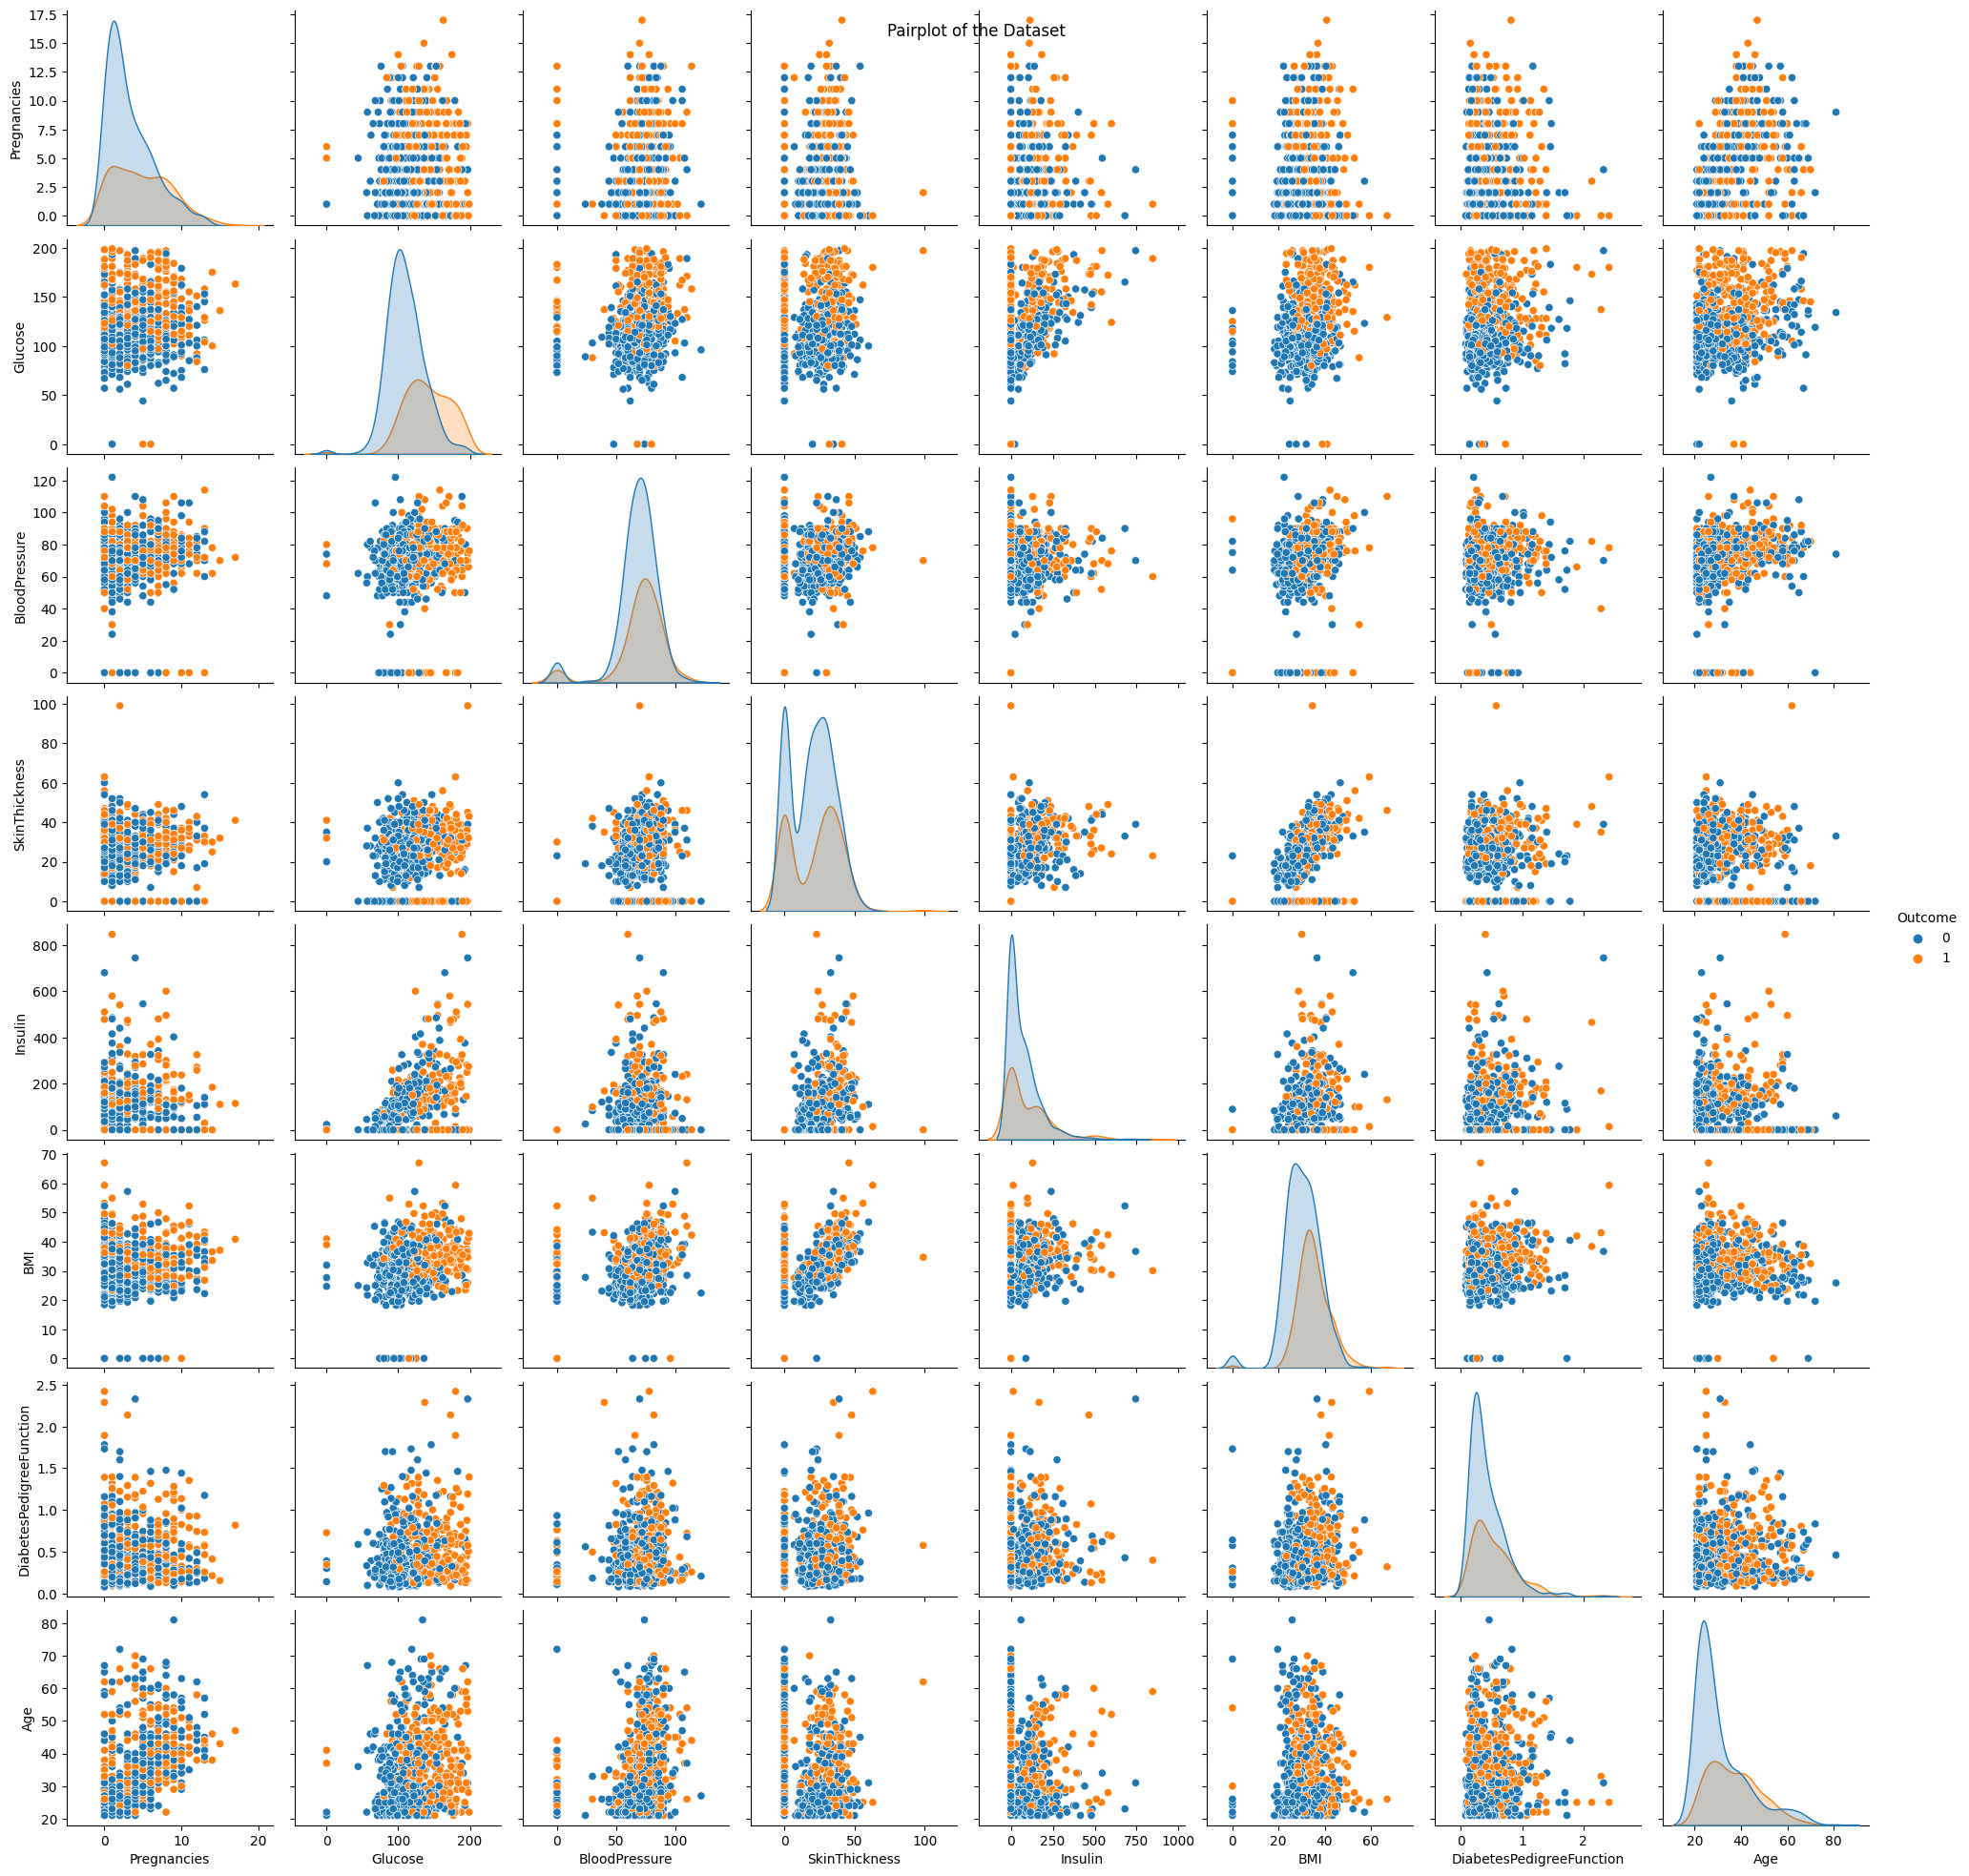

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Outcome' is the correct target variable name
sns.pairplot(data, hue="Outcome", diag_kind="kde")
plt.suptitle("Pairplot of the Dataset")
plt.show()

# **Step 3: Split Data into Train and Test Sets**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into 70-30 train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# **Step 4: Apply Machine Learning Algorithms and Evaluate Performance**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [ ]:
# Initialize models
lda = LinearDiscriminantAnalysis()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression()

In [20]:
# Dictionary to store performance metrics
performance_metrics = {}

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Store metrics in the dictionary
    performance_metrics[type(model).__name__] = {'Accuracy': accuracy, 'Classification Report': classification_rep}

    # Display performance metrics
    print(f"Model: {type(model).__name__}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_rep)
    print("=" * 50)


Model: LinearDiscriminantAnalysis
Confusion Matrix:
[[120  31]
 [ 31  49]]
Accuracy: 0.7316017316017316
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       151
           1       0.61      0.61      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231

Model: GaussianNB
Confusion Matrix:
[[119  32]
 [ 27  53]]
Accuracy: 0.7445887445887446
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231

Model: KNeighborsClassifier
Confusion Matrix:
[[119  32]
 [ 39  41]]
Accuracy: 0.6926406926406926
Classifica

# **Step 5: Determine the Best Performing Algorithm**
Review the output of accuracy, confusion matrix, and classification report to determine which algorithm performs best.

In [25]:
# Determine the best-performing algorithm based on accuracy
best_model = max(performance_metrics, key=lambda k: performance_metrics[k]['Accuracy'])
print(f"The best-performing algorithm is: {best_model}")
print("Accuracy:", performance_metrics[best_model]['Accuracy'])
print("Classification Report:")
print(performance_metrics[best_model]['Classification Report'])

The best-performing algorithm is: GaussianNB
Accuracy: 0.7445887445887446
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



# **Confusion matrices for each algorithm**

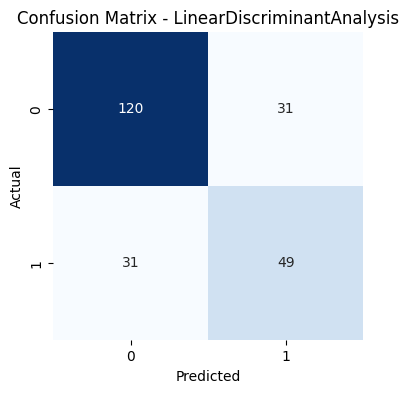

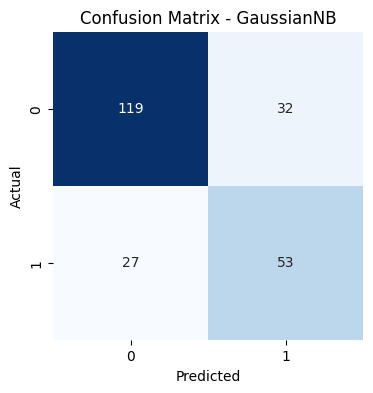

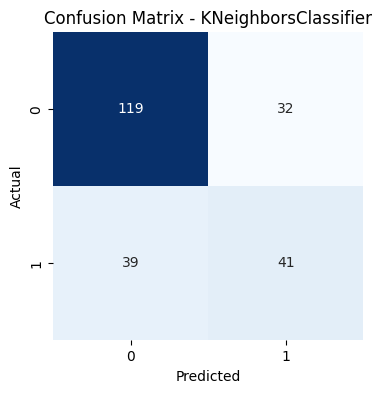

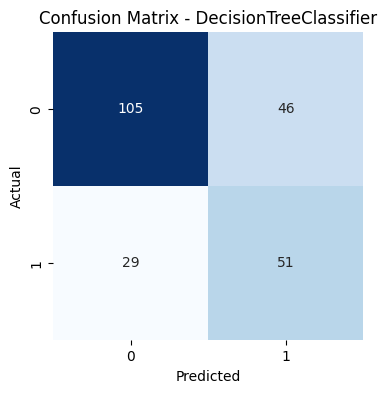

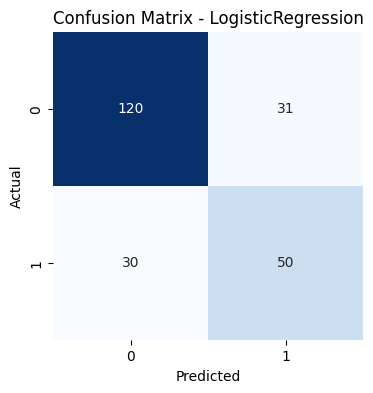

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Loop through models and plot confusion matrix for each
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, title=f"Confusion Matrix - {type(model).__name__}")


# **A bar chart for accuracy**

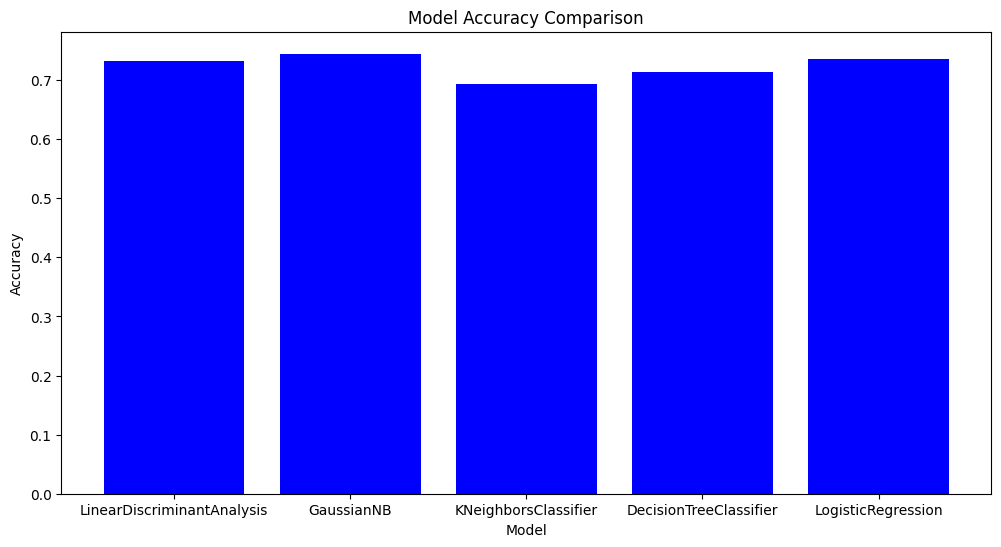

In [ ]:
import matplotlib.pyplot as plt

# Lists to store model names and corresponding accuracies
model_names = []
accuracies = []

# Loop through models and calculate accuracy for each
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Append model name and accuracy to lists
    model_names.append(type(model).__name__)
    accuracies.append(accuracy)

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot bar chart with increased horizontal and vertical lengths
plt.bar(model_names, accuracies, color='blue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Show the plot
plt.show()


# **Step 6: Downsample the Data to Balance It**

In [ ]:
from sklearn.utils import resample

# Downsample the majority class
data_majority = data[data['Outcome'] == 0]
data_minority = data[data['Outcome'] == 1]

data_majority_downsampled = resample(data_majority, replace=False, n_samples=len(data_minority), random_state=42)

# Combine the downsampled majority class with the minority class
data_downsampled = pd.concat([data_majority_downsampled, data_minority])


# **Step 7: Repeat Steps 4-5 with the Downsampled Dataset**
Repeat the preprocessing, splitting, and applying machine learning algorithms on the downsampled dataset.

In [14]:
from sklearn.utils import resample

# Downsample the majority class
data_majority = data[data['Outcome'] == 0]
data_minority = data[data['Outcome'] == 1]

data_majority_downsampled = resample(data_majority, replace=False, n_samples=len(data_minority), random_state=42)

# Combine the downsampled majority class with the minority class
data_downsampled = pd.concat([data_majority_downsampled, data_minority])


# **7.1. Preprocess the Downsampled Dataset**

In [15]:
# Separate features and target variable for downsampled data
X_downsampled = data_downsampled.drop("Outcome", axis=1)
y_downsampled = data_downsampled["Outcome"]

# Normalize the values for downsampled data (using the same scaler from before)
X_downsampled_normalized = scaler.transform(X_downsampled)


# **7.2. Split Downsampled Data into Train and Test Sets**

In [16]:
# Split the downsampled data into 70-30 train and test sets
X_train_downsampled, X_test_downsampled, y_train_downsampled, y_test_downsampled = train_test_split(
    X_downsampled_normalized, y_downsampled, test_size=0.3, random_state=42
)


# **7.3. Apply Machine Learning Algorithms on Downsampled Dataset**

In [23]:
# Initialize models for downsampled data
lda_downsampled = LinearDiscriminantAnalysis()
nb_downsampled = GaussianNB()
knn_downsampled = KNeighborsClassifier()
dt_downsampled = DecisionTreeClassifier()
lr_downsampled = LogisticRegression()

# Fit and predict on downsampled data
models_downsampled = [lda_downsampled, nb_downsampled, knn_downsampled, dt_downsampled, lr_downsampled]

# Dictionary to store performance metrics
performance_metrics_downsampled = {}

for model_downsampled in models_downsampled:
    model_downsampled.fit(X_train_downsampled, y_train_downsampled)
    y_pred_downsampled = model_downsampled.predict(X_test_downsampled)

    # Calculate performance metrics for downsampled data
    accuracy_downsampled = accuracy_score(y_test_downsampled, y_pred_downsampled)
    classification_rep_downsampled = classification_report(y_test_downsampled, y_pred_downsampled)

    # Store metrics in the dictionary
    performance_metrics_downsampled[type(model_downsampled).__name__] = {
        'Accuracy': accuracy_downsampled,
        'Classification Report': classification_rep_downsampled
    }

    # Display performance metrics for downsampled data
    print(f"Model: {type(model_downsampled).__name__} (Downsampled)")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_downsampled, y_pred_downsampled))
    print("Accuracy:", accuracy_downsampled)
    print("Classification Report:")
    print(classification_rep_downsampled)
    print("=" * 50)


Model: LinearDiscriminantAnalysis (Downsampled)
Confusion Matrix:
[[64 12]
 [24 61]]
Accuracy: 0.7763975155279503
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        76
           1       0.84      0.72      0.77        85

    accuracy                           0.78       161
   macro avg       0.78      0.78      0.78       161
weighted avg       0.78      0.78      0.78       161

Model: GaussianNB (Downsampled)
Confusion Matrix:
[[63 13]
 [30 55]]
Accuracy: 0.7329192546583851
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.83      0.75        76
           1       0.81      0.65      0.72        85

    accuracy                           0.73       161
   macro avg       0.74      0.74      0.73       161
weighted avg       0.75      0.73      0.73       161

Model: KNeighborsClassifier (Downsampled)
Confusion Matrix:
[[59 17]
 [24 61]]
Accuracy:

# **7.4: Determine the Best Performing Algorithm for downsampled**

In [24]:
# Determine the best-performing algorithm for downsampled data based on accuracy
best_model_downsampled = max(performance_metrics_downsampled, key=lambda k: performance_metrics_downsampled[k]['Accuracy'])
print(f"The best-performing algorithm for downsampled data is: {best_model_downsampled}")
print("Accuracy:", performance_metrics_downsampled[best_model_downsampled]['Accuracy'])
print("Classification Report:")
print(performance_metrics_downsampled[best_model_downsampled]['Classification Report'])


The best-performing algorithm for downsampled data is: LogisticRegression
Accuracy: 0.782608695652174
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        76
           1       0.84      0.73      0.78        85

    accuracy                           0.78       161
   macro avg       0.79      0.79      0.78       161
weighted avg       0.79      0.78      0.78       161



# **A bar chart for accuracy using downsampled dataset**

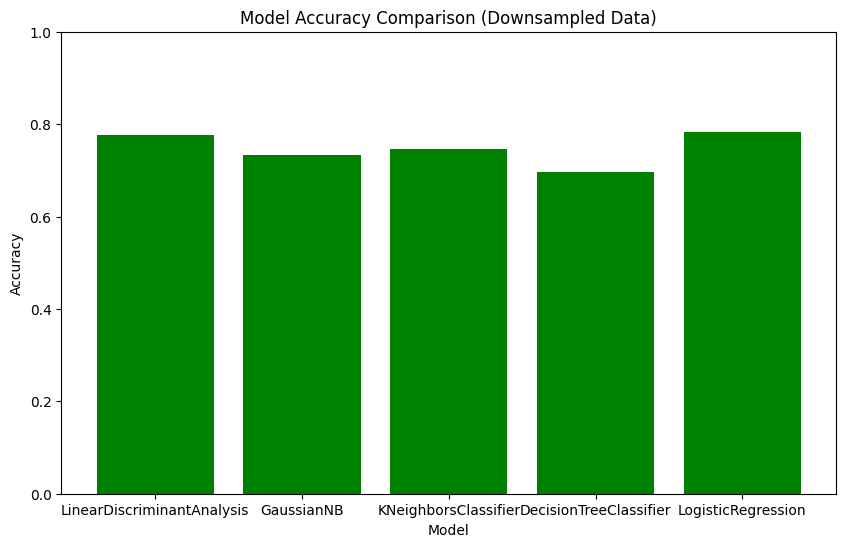

In [26]:
import matplotlib.pyplot as plt

# Lists to store model names and corresponding accuracies for downsampled data
model_names_downsampled = []
accuracies_downsampled = []

# Loop through models for downsampled data and calculate accuracy for each
for model_downsampled in models_downsampled:
    model_downsampled.fit(X_train_downsampled, y_train_downsampled)
    y_pred_downsampled = model_downsampled.predict(X_test_downsampled)

    # Calculate accuracy for downsampled data
    accuracy_downsampled = accuracy_score(y_test_downsampled, y_pred_downsampled)

    # Append model name and accuracy to lists
    model_names_downsampled.append(type(model_downsampled).__name__)
    accuracies_downsampled.append(accuracy_downsampled)

# Plot bar chart for downsampled data
plt.figure(figsize=(10, 6))
plt.bar(model_names_downsampled, accuracies_downsampled, color='green')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison (Downsampled Data)')
plt.ylim(0, 1)  # Set the y-axis limit to represent accuracy percentage
plt.show()
